In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
train = pd.read_csv('train_data.csv')

In [90]:
test = pd.read_csv('test_data.csv')

In [91]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [84]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [85]:
train.shape

(7160, 14)

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [87]:
train['Claim'].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

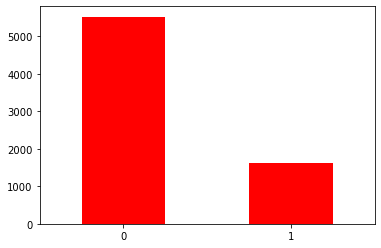

In [88]:
train['Claim'].value_counts().plot(kind='bar',color='red' )
plt.xticks(rotation=0)
plt.show()

In [89]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

In [9]:
label_enc=LabelEncoder()

In [10]:
train['Customer Id']=label_enc.fit_transform (train['Customer Id'])

In [11]:
train['Building_Painted']=label_enc.fit_transform (train['Building_Painted'])

In [12]:
train['Building_Fenced']=label_enc.fit_transform (train['Building_Fenced'])

In [13]:
train['Garden']=label_enc.fit_transform (train['Garden'])

In [14]:
train['Settlement']=label_enc.fit_transform (train['Settlement'])

In [15]:
train['NumberOfWindows']=label_enc.fit_transform (train['NumberOfWindows'])

In [16]:
train['Geo_Code']=label_enc.fit_transform (train['Geo_Code'])

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   int32  
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int32  
 5   Building_Fenced     7160 non-null   int32  
 6   Garden              7160 non-null   int32  
 7   Settlement          7160 non-null   int32  
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   int32  
 12  Geo_Code            7160 non-null   int32  
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int32(7), int64(4)
memory usage: 587.5 KB


In [18]:
train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code                0
Claim                   0
dtype: int64

In [19]:
train['Building Dimension'].unique()

array([ 290.,  490.,  595., ..., 4207., 1775., 1017.])

In [20]:
train['Building Dimension'].mode()

0    400.0
Name: Building Dimension, dtype: float64

In [21]:
train['Building Dimension'].mode()[0]

400.0

In [22]:
train['Building Dimension']=train['Building Dimension'].fillna(train['Building Dimension'].mode()[0])

In [23]:
train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code                0
Claim                   0
dtype: int64

In [24]:
train['Date_of_Occupancy'].unique()

array([1960., 1850., 1800., 1980., 1988., 2013., 2011., 1550., 1900.,
       2007., 1970., 1950., 1700., 1976., 1940., 1920., 1982.,   nan,
       1972., 2010., 1971., 1995., 2006., 1999., 1969., 1985., 1965.,
       1981., 1975., 1997., 2003., 1990., 1930., 1973., 1991., 1974.,
       1978., 1967., 1927., 1952., 1957., 2009., 1977., 1890., 1949.,
       1951., 2008., 1987., 2000., 1962., 1956., 1993., 1912., 1983.,
       1954., 1968., 2004., 1936., 1958., 1966., 1953., 1979., 1946.,
       1955., 2001., 1870., 1961., 2015., 1613., 1964., 1984., 2014.,
       2002., 1986., 1992., 2005., 2012., 1910., 1945., 1864., 1942.,
       1939., 1934., 1998., 1908., 1948., 1860., 1926., 1938., 1895.,
       1545., 1959., 1989., 1996., 1963., 1840., 2016., 1718., 1600.,
       1875., 1898., 1880., 1915., 1994., 1810., 1937., 1907., 1931.,
       1925., 1935., 1824., 1914., 1750., 1846., 1903., 1905., 1906.,
       1830., 1923., 1924., 1928., 1947., 1911., 1901., 1902., 1904.,
       1919., 1896.,

In [25]:
train['Date_of_Occupancy'].mode()[0]

1960.0

In [26]:
train['Date_of_Occupancy']=train['Date_of_Occupancy'].fillna(train['Date_of_Occupancy'].mode()[0])

In [27]:
train.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   int32  
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int32  
 5   Building_Fenced     7160 non-null   int32  
 6   Garden              7160 non-null   int32  
 7   Settlement          7160 non-null   int32  
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   int32  
 12  Geo_Code            7160 non-null   int32  
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int32(7), int64(4)
memory usage: 587.5 KB


In [29]:
train=train.drop('Garden', axis=1)

In [30]:
train=train.drop('Settlement', axis=1)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   int32  
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int32  
 5   Building_Fenced     7160 non-null   int32  
 6   Building Dimension  7160 non-null   float64
 7   Building_Type       7160 non-null   int64  
 8   Date_of_Occupancy   7160 non-null   float64
 9   NumberOfWindows     7160 non-null   int32  
 10  Geo_Code            7160 non-null   int32  
 11  Claim               7160 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 531.5 KB


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   int32  
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int32  
 5   Building_Fenced     7160 non-null   int32  
 6   Building Dimension  7160 non-null   float64
 7   Building_Type       7160 non-null   int64  
 8   Date_of_Occupancy   7160 non-null   float64
 9   NumberOfWindows     7160 non-null   int32  
 10  Geo_Code            7160 non-null   int32  
 11  Claim               7160 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 531.5 KB


In [33]:
train.shape

(7160, 12)

In [34]:
test =pd.read_csv('test_data.csv')

In [35]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [36]:
test.shape

(3069, 13)

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [38]:
test=test.drop('Garden', axis=1)

In [39]:
test=test.drop('Settlement', axis=1)

In [40]:
test.shape

(3069, 11)

In [41]:
test.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [42]:
test['Building Dimension'].mode()[0]

400.0

In [43]:
test['Building Dimension']=test['Building Dimension'].fillna(test['Building Dimension'].mode()[0])

In [44]:
test['Date_of_Occupancy'].mode()[0]

1960.0

In [45]:
test['Date_of_Occupancy']=test['Date_of_Occupancy'].fillna(test['Date_of_Occupancy'].mode()[0])

In [46]:
test['Geo_Code'].mode()[0]

'6083'

In [47]:
test['Geo_Code']=test['Geo_Code'].fillna(test['Geo_Code'].mode()[0])

In [48]:
test.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Building Dimension  3069 non-null   float64
 7   Building_Type       3069 non-null   int64  
 8   Date_of_Occupancy   3069 non-null   float64
 9   NumberOfWindows     3069 non-null   object 
 10  Geo_Code            3069 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 263.9+ KB


In [50]:
test['Building_Painted']=label_enc.fit_transform (test['Building_Painted'])

In [51]:
test['Building_Fenced']=label_enc.fit_transform (test['Building_Fenced'])

In [52]:
test['NumberOfWindows']=label_enc.fit_transform (test['NumberOfWindows'])

In [53]:
test['Geo_Code']=label_enc.fit_transform (test['Geo_Code'])

In [54]:
test['Customer Id']=label_enc.fit_transform (test['Customer Id'])

In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   int32  
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   int32  
 5   Building_Fenced     3069 non-null   int32  
 6   Building Dimension  3069 non-null   float64
 7   Building_Type       3069 non-null   int64  
 8   Date_of_Occupancy   3069 non-null   float64
 9   NumberOfWindows     3069 non-null   int32  
 10  Geo_Code            3069 non-null   int32  
dtypes: float64(3), int32(5), int64(3)
memory usage: 203.9 KB


In [56]:
ss = pd.read_csv('SampleSubmission 2.csv')

In [57]:
ss.head()

,Customer Id,Claim
0,H0,1
1,H10000,1
2,H10001,1
3,H10002,1
4,H10003,1


In [58]:
ss.shape

(3068, 2)

In [59]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer Id  3068 non-null   object
 1   Claim        3068 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.1+ KB


In [60]:
from sklearn import metrics
from sklearn.model_selection import train_test_split 

In [61]:
X=train.drop('Claim', axis=1)
y=train['Claim'] 

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1234)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5728, 11)
(1432, 11)
(5728,)
(1432,)


In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
randomforestmodel.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
random_prediction = randomforestmodel.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_test, random_prediction) * 100

78.0027932960894

In [70]:
RFM_prediction=randomforestmodel.predict(X_test)

In [71]:
RandomFM=randomforestmodel.predict(test)

In [81]:
test

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,1153,2013,1.000000,0,1,0,300.0,1,1960.0,3,142
1,1154,2016,0.997268,0,1,0,300.0,1,1960.0,3,142
2,2966,2013,0.369863,0,1,1,790.0,1,1960.0,0,142
3,1511,2014,1.000000,0,1,0,1405.0,1,2004.0,3,143
4,1512,2016,1.000000,0,1,0,1405.0,1,2004.0,3,143
...,...,...,...,...,...,...,...,...,...,...,...
3064,944,2015,1.000000,0,1,1,400.0,4,1900.0,0,337
3065,1033,2012,1.000000,0,1,1,400.0,2,1948.0,0,337
3066,1034,2012,1.000000,0,1,1,400.0,2,1993.0,0,337
3067,1397,2013,1.000000,0,1,1,400.0,1,1800.0,0,337


In [92]:
a=pd.DataFrame({'Customer Id': test['Customer Id'],  'Claim': RandomFM})

In [93]:
a

,Customer Id,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0
...,...,...
3064,H11583,0
3065,H11720,0
3066,H11721,0
3067,H12408,0


In [94]:
a.to_csv('my prediction1.csv', index =  False)

In [78]:
import pickle
filename = 'insurance_prediction.sav'
pickle.dump(randomforestmodel, open(filename, 'wb'))

In [79]:
X.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Building Dimension',
       'Building_Type', 'Date_of_Occupancy', 'NumberOfWindows', 'Geo_Code'],
      dtype='object')

In [80]:
X.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,1076,2013,1.0,0,0,1,290.0,1,1960.0,0,7
1,4056,2015,1.0,0,1,0,490.0,1,1850.0,4,7
2,4990,2014,1.0,0,0,1,595.0,1,1960.0,0,7
3,5006,2013,1.0,0,1,1,2840.0,1,1960.0,0,7
4,5774,2014,1.0,0,1,0,680.0,1,1800.0,3,7
